In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
wq = pd.read_csv('../03.분류/data/winequality-red.csv')
wq['target'] = wq.quality.apply(lambda x: 1 if x >= 6 else 0)
X = wq.iloc[:, :-2].values
y = wq.target.values
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
def pca_accuracy(X, y):
    X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=2023
    )
    rfc = RandomForestClassifier(random_state=2023)
    rfc.fit(X_train, y_train)
    score = rfc.score(X_test, y_test)
    return score

In [5]:
from sklearn.decomposition import PCA
def pca(n):
    pca = PCA(n_components=n)
    X_pca = pca.fit_transform(X_std)
    explained = sum(pca.explained_variance_ratio_)
    acc = pca_accuracy(X_pca, y)
    print(f'PCA{n}: 설명력-{explained:.4f}, 정확도-{acc:.4f}')

In [6]:
for i in range(2, 7):
    pca(i)

PCA2: 설명력-0.4568, 정확도-0.7156
PCA3: 설명력-0.5978, 정확도-0.7969
PCA4: 설명력-0.7081, 정확도-0.8063
PCA5: 설명력-0.7953, 정확도-0.8031
PCA6: 설명력-0.8552, 정확도-0.8094


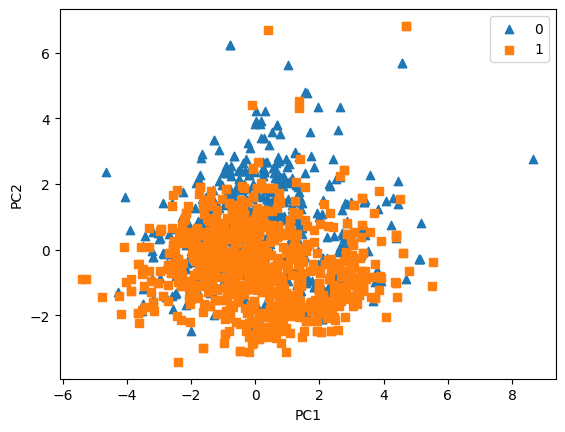

In [7]:
pca = PCA(2)
X_pca = pca.fit_transform(X_std)
df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df['target'] = y
markers = ['^', 's']
for i, marker in enumerate(markers):
    x_data = df[df.target == i]['PC1']
    y_data = df[df.target == i]['PC2']
    plt.scatter(x_data, y_data, marker=marker, label=i)

plt.legend()
plt.xlabel('PC1'), plt.ylabel('PC2')
plt.show()

In [9]:
from sklearn.cluster import KMeans
kmeans = KMeans(2, random_state=2023, n_init='auto')
kmeans.fit(X_std)
df['cluster'] = kmeans.labels_

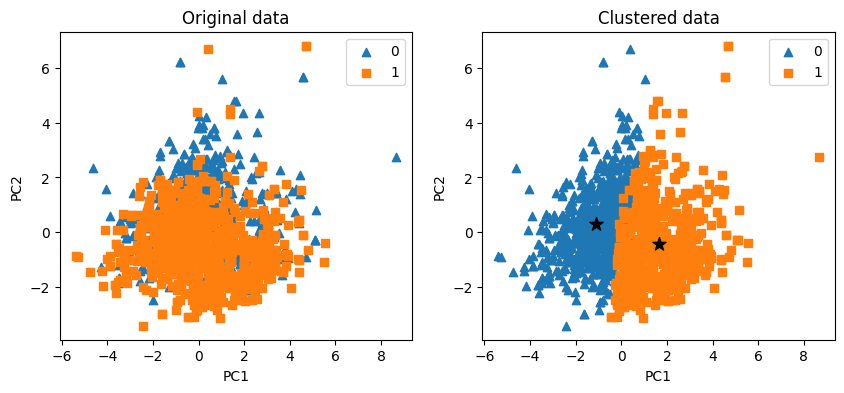

In [10]:
markers = ['^', 's']
plt.figure(figsize=(10, 4))
for k, column in enumerate(['target', 'cluster']):
    plt.subplot(1, 2, k+1)
    for i, marker in enumerate(markers):
        x_data = df[df[column] == i]['PC1']
        y_data = df[df[column] == i]['PC2']
        if k == 0:
            plt.scatter(x_data, y_data, marker=marker, label=i)
        else:
            plt.scatter(x_data, y_data, marker=marker, label=i)
            plt.scatter(x_data.mean(), y_data.mean(), marker='*', c='black', s=100)

    plt.legend()
    plt.xlabel('PC1'), plt.ylabel('PC2')
    if k == 0:
        plt.title('Original data')
    else:
        plt.title('Clustered data')
plt.show()

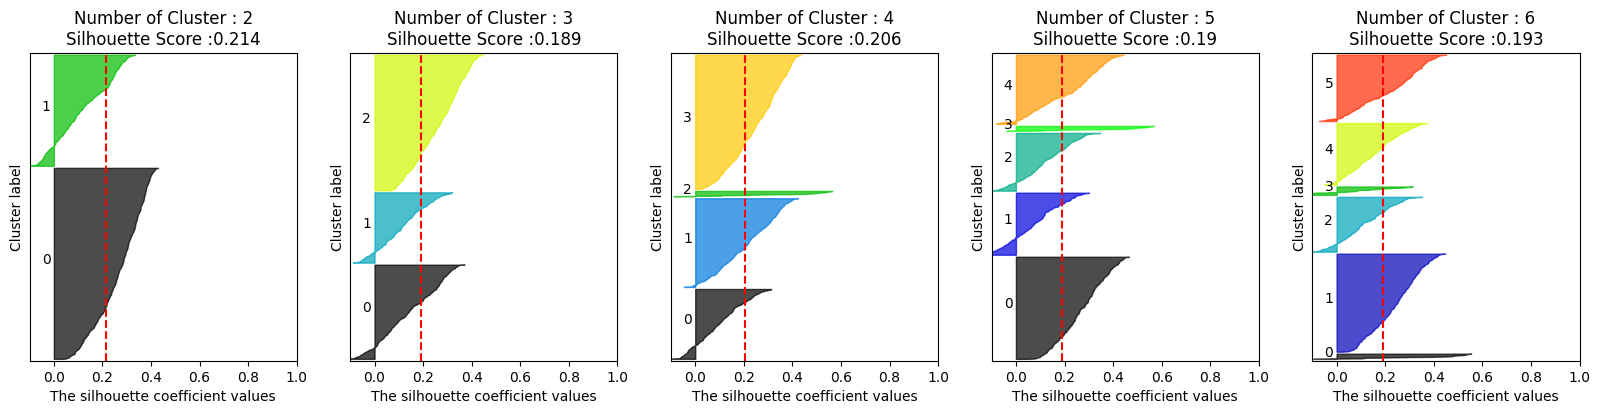

In [11]:
import warnings
warnings.filterwarnings('ignore')
from visualize import visualize_silhouette
visualize_silhouette([2, 3, 4, 5, 6], X_std)